In [7]:
# Load Libraries

import os
import sys
import joblib
from datetime import datetime
import glob
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima



In [2]:
# Add the 'scripts' folder to the Python path
scripts_path = os.path.abspath("../scripts")
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Load personal modules  
from wrangle import wrangle, merge_monthly_files, load_combined_series

In [3]:
# wrangle data
filepath = "../data/monthly_p2_readings/2023_11.csv"

df = wrangle(filepath=filepath)
df.head()

,sensor_id,sensor_type,location,lat,lon,value_type,PM2.5
date,,,,,,,
2023-11-01 17:44:52.764459+01:00,4855,pms5003,3629,6.428,3.435,P2,19.00
2023-11-01 18:52:08.924982+01:00,4857,pms5003,3630,6.540,3.297,P2,3.50
2023-11-01 18:53:13.805911+01:00,4857,pms5003,3630,6.540,3.297,P2,3.00
2023-11-01 19:16:42.515782+01:00,4853,pms5003,3628,6.559,3.386,P2,40.33
2023-11-03 08:38:39.664224+01:00,4857,pms5003,3630,6.540,3.297,P2,47.00


In [4]:
# Cimbine multiple datasets
folder_path= "../data/monthly_p2_readings/"
output_csv_path= "../data/Air_Quality_Lagos_Combined.csv"

merge_monthly_files().head()

Processed 2023_11.csv
Processed 2023_12.csv
Processed 2024_01.csv
Processed 2024_02.csv
Processed 2024_03.csv
Processed 2024_04.csv
Processed 2024_05.csv
Processed 2024_06.csv
Processed 2024_07.csv
Processed 2024_08.csv
Processed 2024_09.csv
Processed 2024_10.csv
Processed 2024_11.csv
Processed 2024_12.csv
Processed 2025_01.csv
Processed 2025_02.csv
Processed 2025_03.csv
Processed 2025_04.csv

Combined shape: (73601, 7)


,sensor_id,sensor_type,location,lat,lon,value_type,PM2.5
date,,,,,,,
2023-11-01 17:44:52.764459+01:00,4855,pms5003,3629,6.428,3.435,P2,19.00
2023-11-01 18:52:08.924982+01:00,4857,pms5003,3630,6.540,3.297,P2,3.50
2023-11-01 18:53:13.805911+01:00,4857,pms5003,3630,6.540,3.297,P2,3.00
2023-11-01 19:16:42.515782+01:00,4853,pms5003,3628,6.559,3.386,P2,40.33
2023-11-03 08:38:39.664224+01:00,4857,pms5003,3630,6.540,3.297,P2,47.00


In [5]:
# Load Combined dataset into dataframe
y = load_combined_series()
shape = y.shape

print(f"The Shape of the Dataset is: {shape}")
print(f"The Dataset has: {shape[0]} historical data")
print(f"The number of missing data is: {y.isna().sum()}")

y.head()

The Shape of the Dataset is: (2068,)
The Dataset has: 2068 historical data
The number of missing data is: 0


date
2023-11-01 12:00:00+01:00    19.000000
2023-11-01 18:00:00+01:00    15.610000
2023-11-02 00:00:00+01:00    19.867137
2023-11-02 06:00:00+01:00    24.124275
2023-11-02 12:00:00+01:00    28.381412
Freq: 6h, Name: PM2.5, dtype: float64

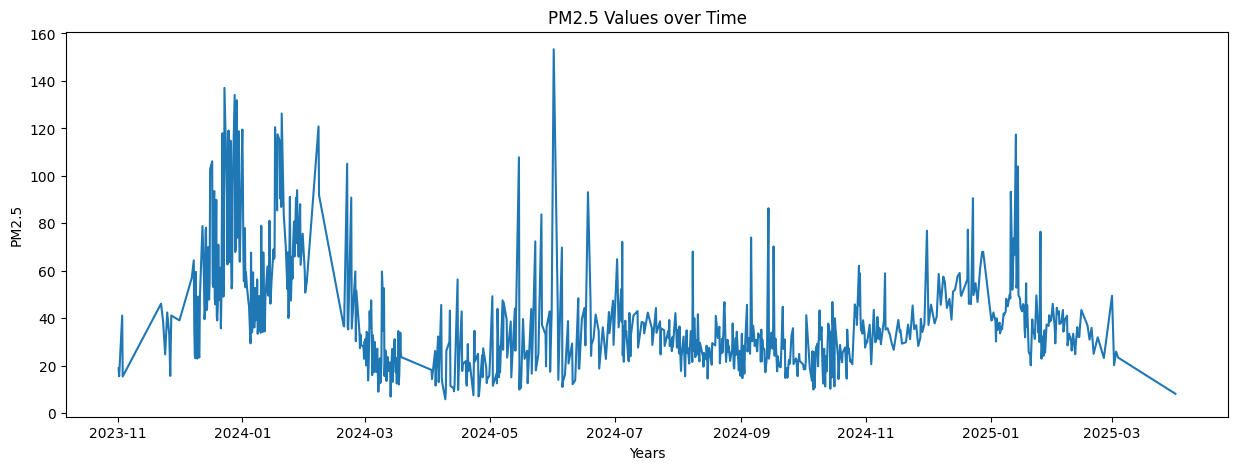

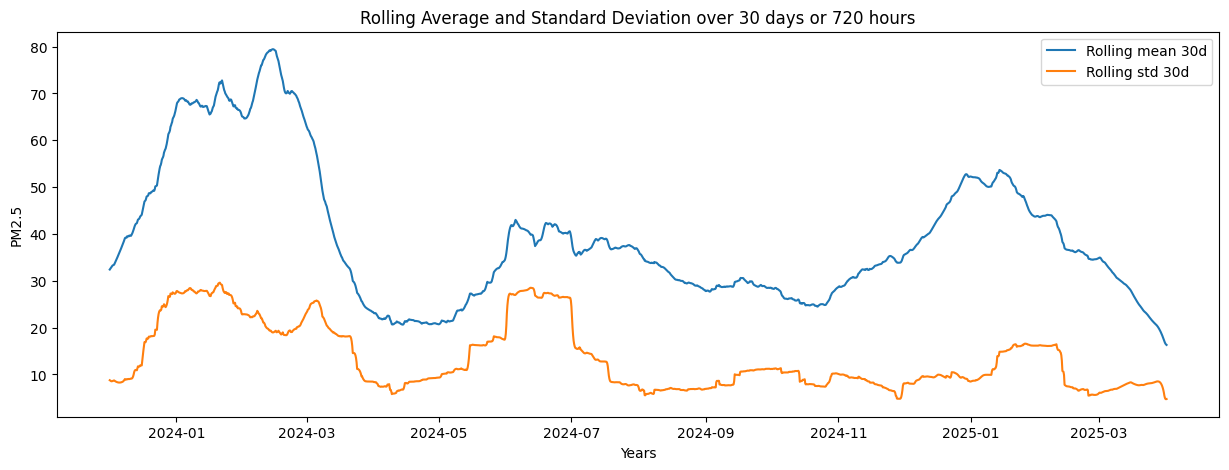

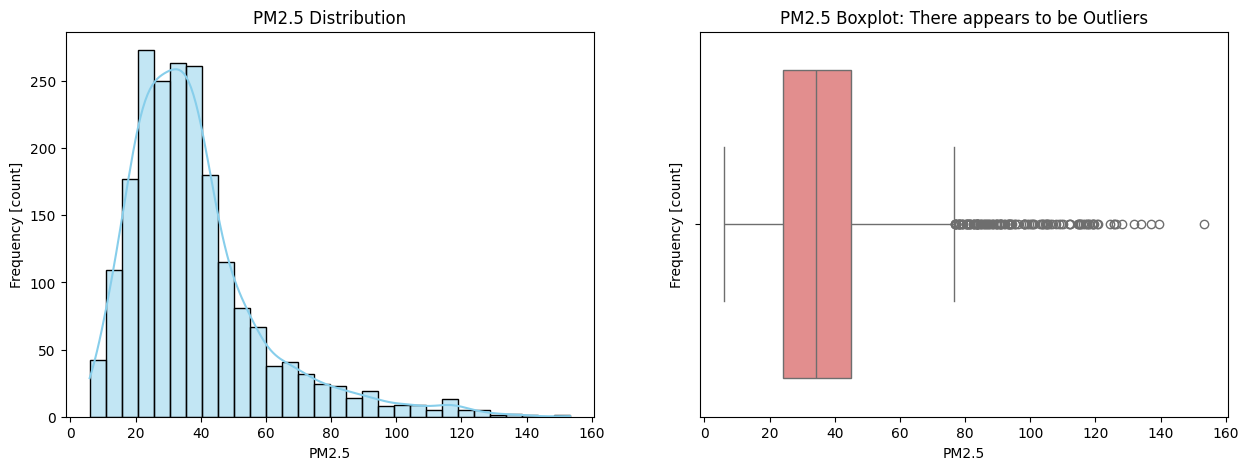

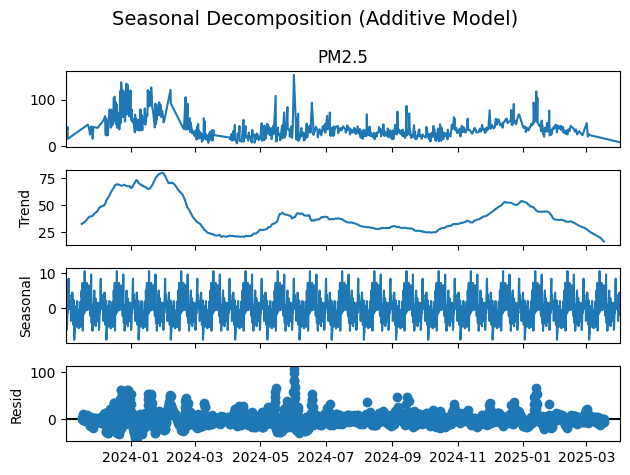

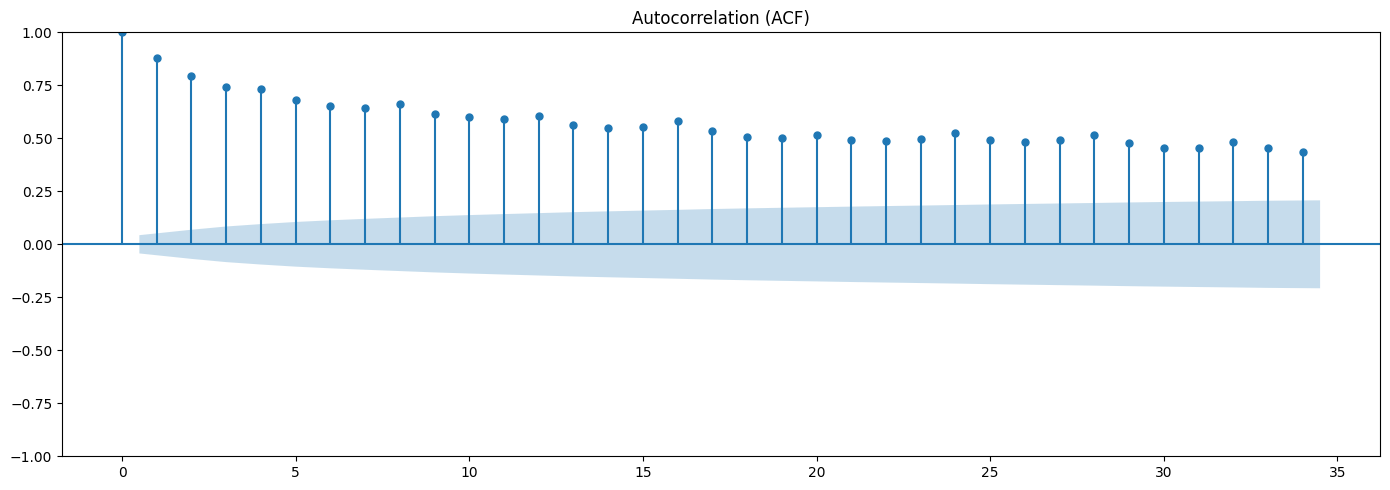

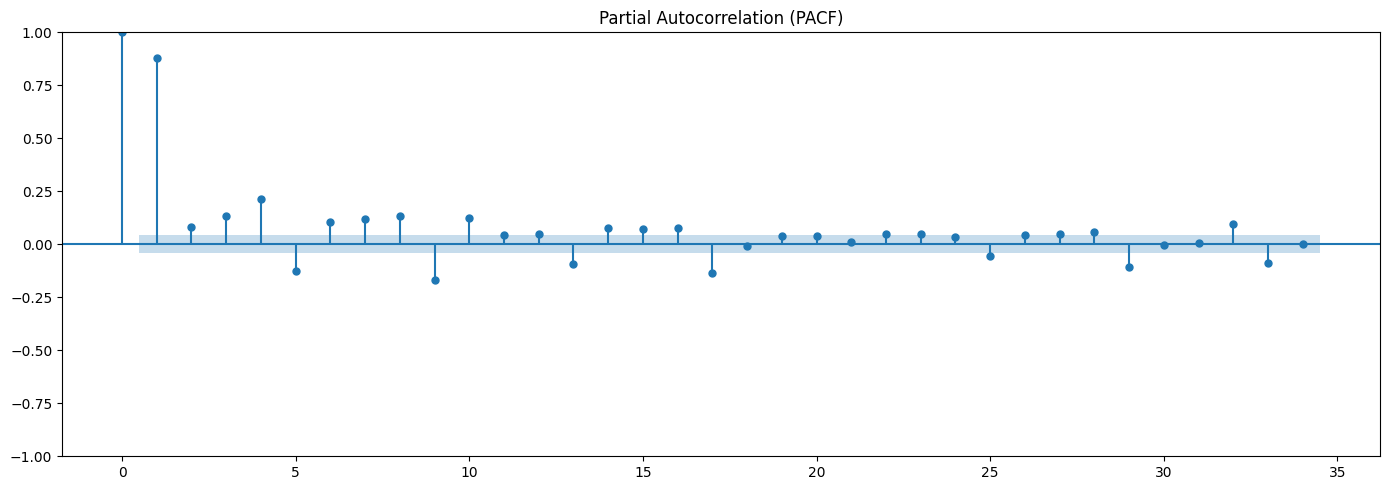

In [8]:
# PM2.5 Over time
fig, ax = plt.subplots(figsize = (15, 5))
plt.plot(y)
plt.title("PM2.5 Values over Time")
plt.xlabel("Years")
plt.ylabel("PM2.5")
plt.show()

window = 120
# rolling mean for 30 days or 720 hours
rolling_mean = y.rolling(window= window).mean()

# rolling variance for 30 days or 720 hours
rolling_std = y.rolling(window = window).std()

# Plot charts
fig, ax = plt.subplots(figsize = (15, 5))
plt.plot(rolling_mean, label = "Rolling mean 30d")
plt.plot(rolling_std, label = "Rolling std 30d")
plt.title("Rolling Average and Standard Deviation over 30 days or 720 hours")
plt.xlabel("Years")
plt.ylabel("PM2.5")

plt.legend()
plt.show()

# Figure size
plt.figure(figsize= (15, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True, bins =  30, color= "skyblue")
plt.title("PM2.5 Distribution")
plt.ylabel("Frequency [count]")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y, color= "lightcoral", orient="h")
plt.title("PM2.5 Boxplot: There appears to be Outliers")
plt.ylabel("Frequency [count]")

plt.show()

period = 120

# Instantiate the seasonal_decompose
decomposition = seasonal_decompose(y, model="additive", period=period)

# Plot the Chart
decomposition.plot()
plt.suptitle("Seasonal Decomposition (Additive Model)", fontsize=14)
plt.tight_layout()
plt.show()

# plot_acf

fig, ax = plt.subplots(figsize=(14, 5))
plot_acf(y, ax=ax)
plt.title("Autocorrelation (ACF)")
plt.tight_layout()
plt.show()

# plot_pacf

fig, ax = plt.subplots(figsize=(14, 5))
plot_pacf(y, ax=ax)
plt.title("Partial Autocorrelation (PACF)")
plt.tight_layout()
plt.show()